In [1]:
#adding in new genes to analysis 16p11.2

In [2]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm
import statistics
import statsmodels.api as sm

In [3]:
cd ../Data/Genemaps

/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [4]:
#read in symptom patient data and slice out important columns
df = pd.read_csv('/mmfs1/data/pijarj/Data4Julianna/df_patients_S699.csv')
df.columns
df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']]

,ados_total,ados_comm,ados_social,ados_rrb
0,18.0,6.0,12.0,2.0
1,NaN,NaN,NaN,NaN
2,13.0,4.0,9.0,NaN
3,12.0,4.0,8.0,2.0
4,16.0,5.0,11.0,3.0
...,...,...,...,...
694,NaN,NaN,NaN,NaN
695,NaN,NaN,NaN,NaN
696,13.0,4.0,9.0,2.0
697,8.0,2.0,6.0,2.0


In [5]:
#load in cmat data
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
diffmat = np.load('/mmfs1/data/pijarj/Data4Julianna/recon_asd_mu.npz')
diffmat = diffmat['data']
diffmat.shape

(699, 51, 51)

In [6]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()

In [7]:
nsubjects = 699
ngenes = len(genemaps)
print(nsubjects)
print(ngenes)

gene_fmri_corr = np.zeros((ngenes,nsubjects))
gene_fmri_corr

699
34


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
    gene_sim = np.zeros((51,51))
    for i in range(51):
        for j in range(51):
            gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

    triu = np.triu_indices(51,k=1)
    gene_vec = gene_sim[triu]

    for s in range(nsubjects):
        subject_diffmat = diffmat[s,:,:] # correlation matrices for one subject
        fmri_vec = subject_diffmat[triu]
        data = np.corrcoef(gene_vec,fmri_vec)[0,1]
        gene_fmri_corr[g,s] = data

100%|██████████| 34/34 [00:03<00:00,  9.87it/s]


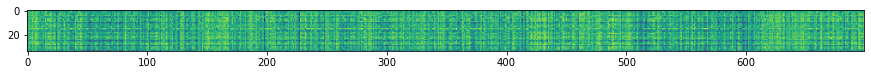

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(gene_fmri_corr)

In [10]:
gene_fmri_corr.shape

(34, 699)

In [11]:
col_id = 0
Y_total = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_total = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_total = ~np.isnan(Y_total)[:,col_id]
Y_use_total = Y_total[good_subjects_total,col_id] 
X_use_total = gene_fmri_corr[:,good_subjects_total]
X_use_total = X_use_total.transpose()
regression_total =  linear_model.LinearRegression(normalize=True)
linear_regression_total = regression_total.fit(X_use_total,Y_use_total) 
Y_use_hat_total = linear_regression_total.predict(X_use_total)

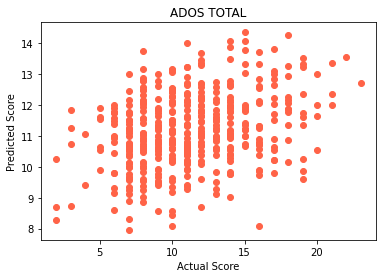

In [12]:
#scatter plot for ados_total
plt.scatter(Y_use_total,Y_use_hat_total,color='tomato')
plt.title('ADOS TOTAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [13]:
col_id = 1
Y_comm = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_comm = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_comm = ~np.isnan(Y_comm)[:,col_id]
Y_use_comm = Y_comm[good_subjects_comm,col_id] 
X_use_comm = gene_fmri_corr[:,good_subjects_comm]
X_use_comm = X_use_comm.transpose()
regression_comm =  linear_model.LinearRegression(normalize=True)
linear_regression_comm = regression_comm.fit(X_use_comm,Y_use_comm) 
Y_use_hat_comm = linear_regression_comm.predict(X_use_comm)

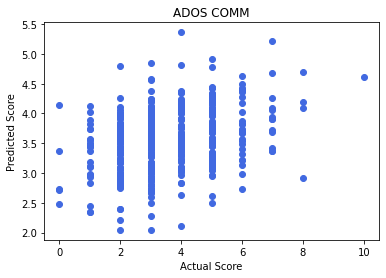

In [14]:
#scatter plot for ados_comm
plt.scatter(Y_use_comm,Y_use_hat_comm,color='royalblue')
plt.title('ADOS COMM')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [15]:
col_id = 2
Y_social = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_social = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_social = ~np.isnan(Y_social)[:,col_id]
Y_use_social = Y_social[good_subjects_social,col_id] 
X_use_social = gene_fmri_corr[:,good_subjects_social]
X_use_social = X_use_social.transpose()
regression_social =  linear_model.LinearRegression(normalize=True)
linear_regression_social = regression_social.fit(X_use_social,Y_use_social) 
Y_use_hat_social = linear_regression_social.predict(X_use_social)

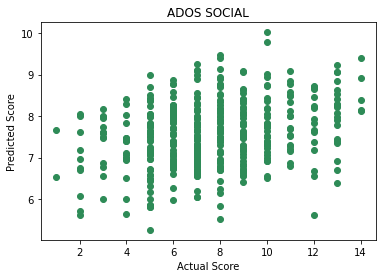

In [16]:
#scatter plot for ados_social
plt.scatter(Y_use_social,Y_use_hat_social,color='seagreen')
plt.title('ADOS SOCIAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [17]:
col_id = 3
Y_rrb = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_rrb = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_rrb = ~np.isnan(Y_rrb)[:,col_id]
Y_use_rrb = Y_rrb[good_subjects_rrb,col_id] 
X_use_rrb = gene_fmri_corr[:,good_subjects_rrb]
X_use_rrb = X_use_rrb.transpose()
regression_rrb =  linear_model.LinearRegression(normalize=True)
linear_regression_rrb = regression_rrb.fit(X_use_rrb,Y_use_rrb) 
Y_use_hat_rrb = linear_regression_rrb.predict(X_use_rrb)

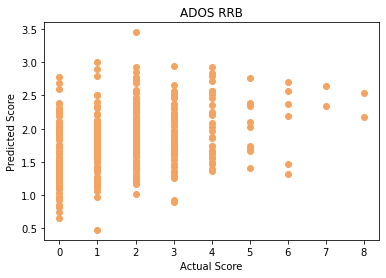

In [18]:
#scatter plot for ados_rrb
plt.scatter(Y_use_rrb,Y_use_hat_rrb,color='sandybrown')
plt.title('ADOS RRB')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [19]:
#variance explained for ados_total
from sklearn.metrics import explained_variance_score
total = explained_variance_score(Y_use_total,Y_use_hat_total)*100
print(total)

9.723852977746983


In [20]:
#variance explained for ados_comm
from sklearn.metrics import explained_variance_score
comm = explained_variance_score(Y_use_comm,Y_use_hat_comm)*100
print(comm)

11.217576078616787


In [21]:
#variance explained for ados_social
from sklearn.metrics import explained_variance_score
social = explained_variance_score(Y_use_social,Y_use_hat_social)*100
print(social)

8.59150681429648


In [22]:
#variance explained for ados_rrb
from sklearn.metrics import explained_variance_score
rrb = explained_variance_score(Y_use_rrb,Y_use_hat_rrb)*100
print(rrb)

9.511038915300407


Text(0.5, 0, 'Symptom')

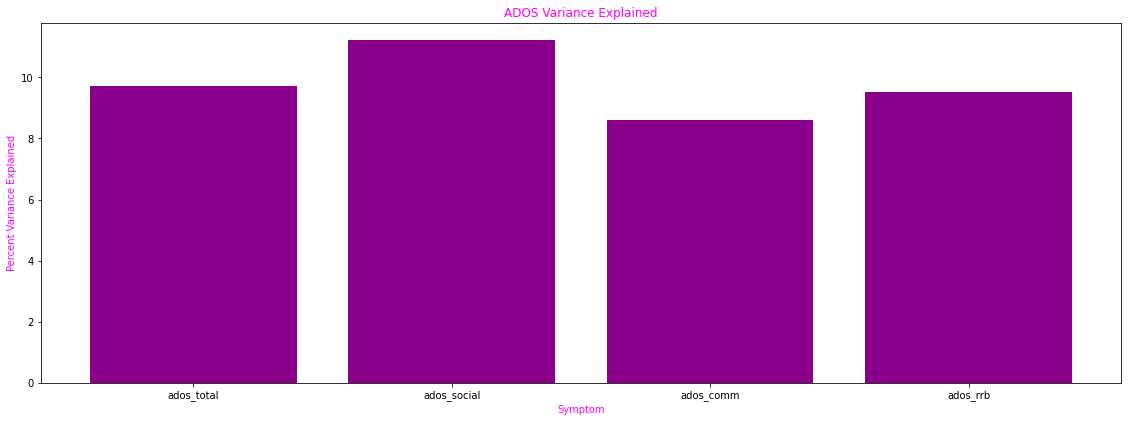

In [23]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
var_explained = total, comm, social, rrb
plt.bar(ados_label,var_explained,color='midnightblue')
plt.title('ADOS Variance Explained',color='magenta')
plt.ylabel('Percent Variance Explained',color='magenta')
plt.xlabel('Symptom',color='magenta')

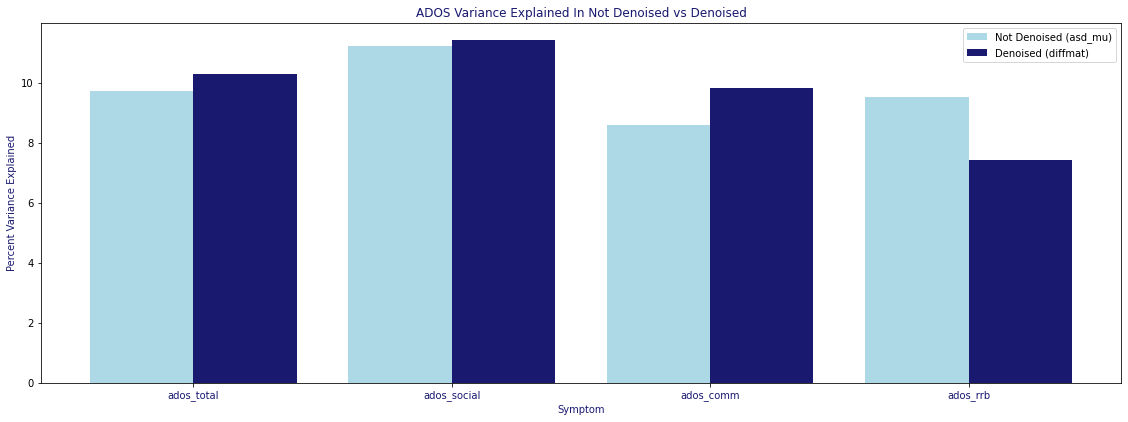

In [24]:
#variance explained of denoised vs not denoised
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
x_axis = np.arange(len(ados_label))

#not denoised is asd_mu
not_denoised = var_explained

#denoised is diffmat
denoised = [10.275377457393297,11.421311909316412,9.829745539144419,7.4275680932783805]

#plot bar graph
plt.bar(x_axis-0.2,not_denoised,0.4,label='Not Denoised (asd_mu)',color='lightblue')
plt.bar(x_axis+0.2,denoised,0.4,label='Denoised (diffmat)',color='midnightblue')
plt.title('ADOS Variance Explained In Not Denoised vs Denoised',color='midnightblue')
plt.xticks(x_axis, ados_label,color='midnightblue')
plt.xlabel('Symptom',color='midnightblue')
plt.ylabel('Percent Variance Explained',color='midnightblue')
plt.legend()
plt.show()

In [25]:
#correlation coefficents for ados_total
coefficient_total = regression_total.coef_
labels = ['CDIPT','CORO1A','ATXN2L','ZG16','ALDOA','CYFIP1','QPRT','SH2B1','SEZ6L2','LAT','KIF22','MAZ','ATP2A1','PPP4C','GDPD3','MAPK3','RABEP2','NIPA2','YPEL3','SPNS1','NFATC2IP','SPN','TUFM','PRRT2','TUBGCP5','NIPA1','TMEM219','DOC2A','HIRIP3','KCTD13','ASPHD1','TAOK2','CD19','MVP']
print(column_total)
print()
for i in range(0,34):
    print(f'{labels[i]},{coefficient_total[i]}')

ados_total

CDIPT,-0.3072435066567989
CORO1A,-15.922242570404457
ATXN2L,4.6317507037825525
ZG16,7.926405938074261
ALDOA,25.603641093354714
CYFIP1,-9.88409265387564
QPRT,-7.093158325208204
SH2B1,10.619629960186339
SEZ6L2,7.102665008312698
LAT,9.28012439365603
KIF22,11.097732269066327
MAZ,26.26071028674981
ATP2A1,9.561527396409096
PPP4C,7.581977088383044
GDPD3,21.22753266578576
MAPK3,-7.671117102372819
RABEP2,-0.6457098592417595
NIPA2,8.378579331085886
YPEL3,51.895348921855955
SPNS1,6.322818456684473
NFATC2IP,9.187713766790791
SPN,-14.566819044956993
TUFM,-59.454812905726584
PRRT2,-22.320269014712572
TUBGCP5,-37.0071047684288
NIPA1,-4.683867877779284
TMEM219,9.269840068780452
DOC2A,9.903219455775425
HIRIP3,-12.64609334951959
KCTD13,-11.417161441334862
ASPHD1,-9.207849423054228
TAOK2,-10.449103914701501
CD19,-9.239899389496973
MVP,-7.122445687060052


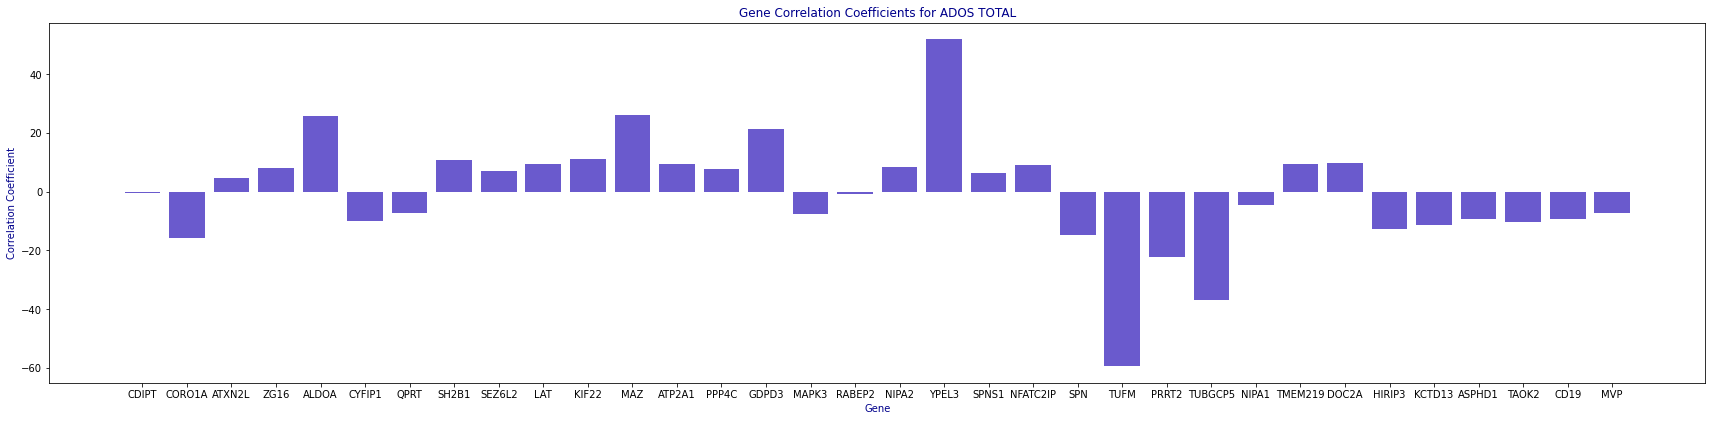

In [27]:
fig = plt.figure(figsize=(23,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_total,color='slateblue')
plt.title('Gene Correlation Coefficients for ADOS TOTAL',color='darkblue')
plt.ylabel('Correlation Coefficient',color='darkblue')
plt.xlabel('Gene',color='darkblue')
plt.show()

In [28]:
#correlation coefficents for ados_comm
coefficient_comm = regression_comm.coef_
print(column_comm)
print()
for i in range(0,34):
    print(f'{labels[i]},{coefficient_comm[i]}')

ados_comm

CDIPT,-4.45290827382172
CORO1A,-10.239348191880882
ATXN2L,-10.794715345671223
ZG16,12.561838064401936
ALDOA,13.309080134704253
CYFIP1,-6.373632057532116
QPRT,0.4164476041167022
SH2B1,8.599792343019288
SEZ6L2,-2.232629279256665
LAT,14.759945349468104
KIF22,8.382165122761306
MAZ,7.981353397992858
ATP2A1,4.039835466982339
PPP4C,-7.404592016139509
GDPD3,16.261630883349547
MAPK3,-0.48301320440060513
RABEP2,3.3047584988352856
NIPA2,-0.6211391522149129
YPEL3,23.428854098290227
SPNS1,-9.270304124596507
NFATC2IP,7.235283026524558
SPN,-7.70390095217939
TUFM,-9.500317819138894
PRRT2,-11.651927294301396
TUBGCP5,-11.49241774440852
NIPA1,0.008036574157689585
TMEM219,-6.511581813358067
DOC2A,10.687198264785364
HIRIP3,-11.053805586175779
KCTD13,-7.821302477523833
ASPHD1,-6.191573520578578
TAOK2,-4.672776942531163
CD19,0.9003893358015378
MVP,-0.7366842939386743


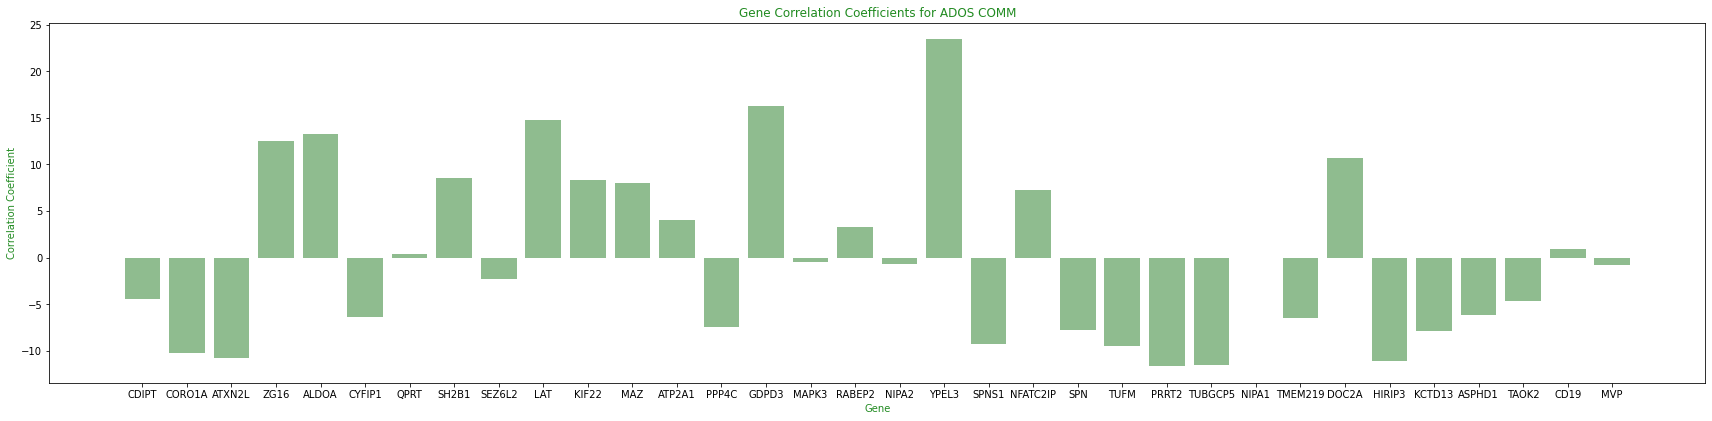

In [29]:
fig = plt.figure(figsize=(23,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_comm,color='darkseagreen')
plt.title('Gene Correlation Coefficients for ADOS COMM',color='forestgreen')
plt.ylabel('Correlation Coefficient',color='forestgreen')
plt.xlabel('Gene',color='forestgreen')
plt.show()

In [30]:
#correlation coefficents for ados_social
coefficient_social = regression_social.coef_
print(column_social)
print()
for i in range(0,34):
    print(f'{labels[i]},{coefficient_social[i]}')

ados_social

CDIPT,1.890872652615193
CORO1A,-6.961237968842263
ATXN2L,8.859634789055018
ZG16,-0.46785444892811445
ALDOA,11.176450878099189
CYFIP1,-5.6035082664699525
QPRT,-4.17894764571413
SH2B1,6.190730741108307
SEZ6L2,7.574148869617508
LAT,-2.419588566550444
KIF22,4.053878475722791
MAZ,16.027315609188364
ATP2A1,8.204447398449851
PPP4C,5.846515677518071
GDPD3,9.379344164799472
MAPK3,-4.408398853408883
RABEP2,-0.7908442881760117
NIPA2,5.390396951458453
YPEL3,28.252003343601025
SPNS1,7.7874549731026255
NFATC2IP,5.949462173761468
SPN,-3.455681053826456
TUFM,-37.49524067496597
PRRT2,-10.627428348432277
TUBGCP5,-21.432133249612047
NIPA1,-1.6091812880051586
TMEM219,7.201598892351868
DOC2A,1.7127107978765002
HIRIP3,-7.112382570034176
KCTD13,-2.9894429362513173
ASPHD1,-4.135962344202809
TAOK2,-8.350318314635192
CD19,-9.951746120911316
MVP,-6.5522471421476824


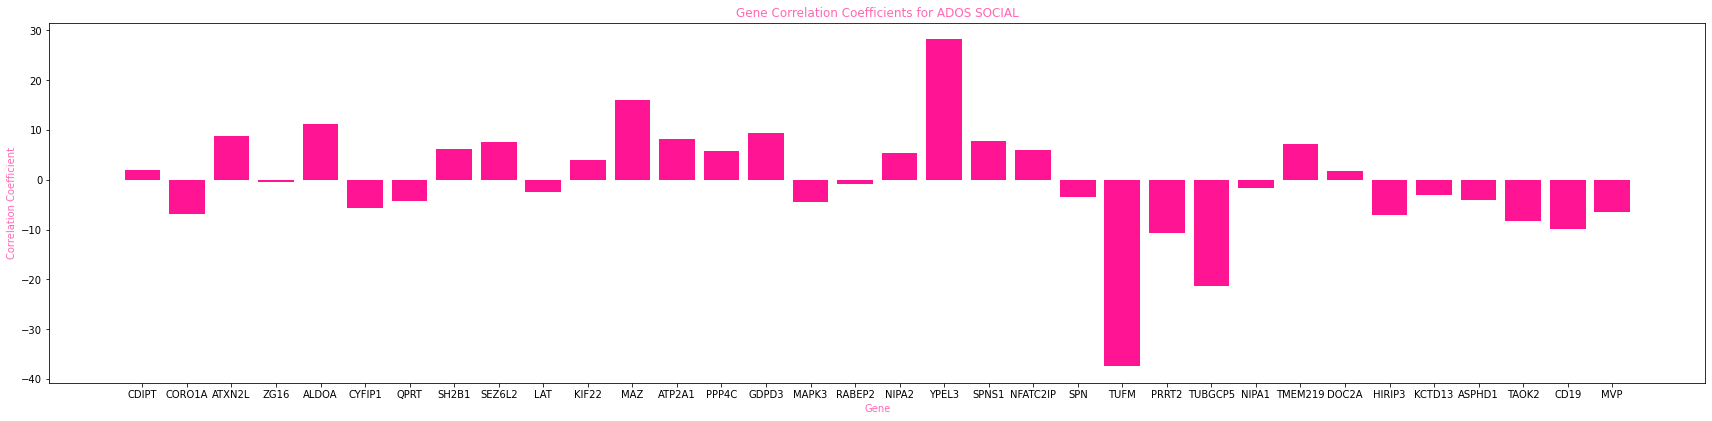

In [31]:
fig = plt.figure(figsize=(23,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_social,color='deeppink')
plt.title('Gene Correlation Coefficients for ADOS SOCIAL',color='hotpink')
plt.ylabel('Correlation Coefficient',color='hotpink')
plt.xlabel('Gene',color='hotpink')
plt.show()

In [32]:
#correlation coefficents for ados_rrb
coefficient_rrb = regression_rrb.coef_
print(column_rrb)
print()
for i in range(0,34):
    print(f'{labels[i]},{coefficient_rrb[i]}')

ados_rrb

CDIPT,-7.687423414317397
CORO1A,4.5598713571118115
ATXN2L,2.990937270657144
ZG16,4.195681863509983
ALDOA,9.40957749472889
CYFIP1,-1.3618003635217095
QPRT,-2.040148161586761
SH2B1,1.388268799828279
SEZ6L2,-7.954487408167974
LAT,-6.8911701839734265
KIF22,5.368890044875306
MAZ,8.079732478596501
ATP2A1,-0.15521005125956017
PPP4C,-9.57372007666597
GDPD3,-0.014789264225544599
MAPK3,-5.441108446052739
RABEP2,-4.613376311407543
NIPA2,2.918815858131319
YPEL3,13.873209695559265
SPNS1,5.410951571242908
NFATC2IP,2.366269049904319
SPN,-2.7798969137631246
TUFM,-2.255843391550381
PRRT2,0.19847013861138596
TUBGCP5,-5.223313364682212
NIPA1,-0.49018597197149605
TMEM219,6.78046519594206
DOC2A,1.1122896389640697
HIRIP3,-2.8052700224776586
KCTD13,-6.229266769955845
ASPHD1,-5.424062157546831
TAOK2,5.527168548870502
CD19,5.213215960912765
MVP,-2.2581701310559636


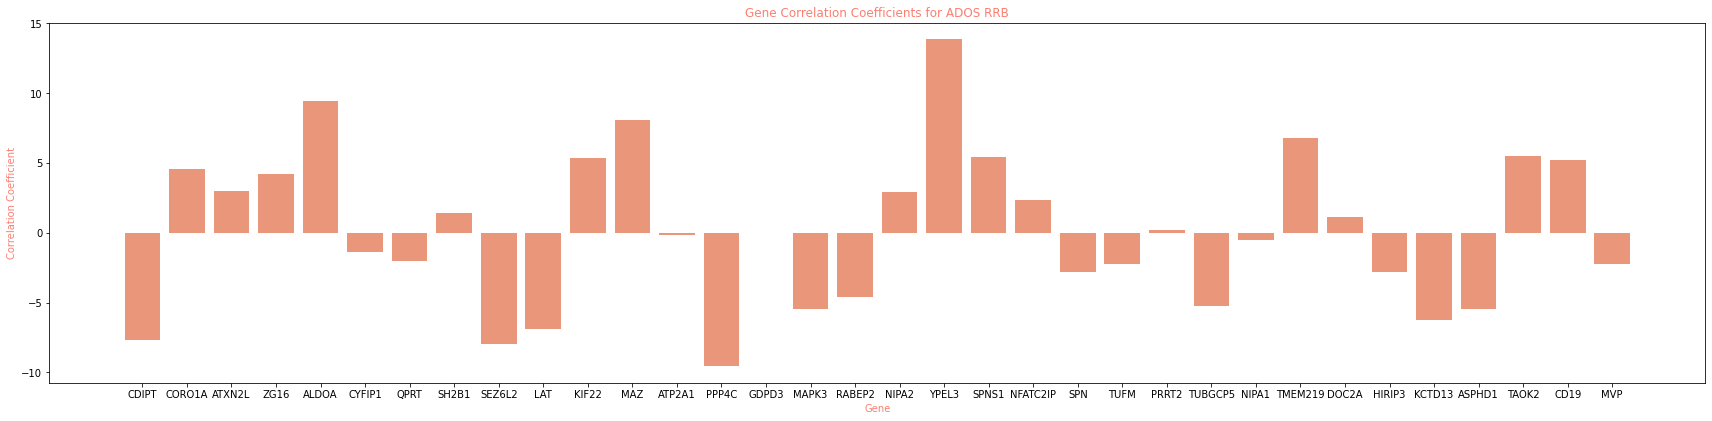

In [33]:
fig = plt.figure(figsize=(23,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_rrb,color='darksalmon')
plt.title('Gene Correlation Coefficients for ADOS RRB',color='salmon')
plt.ylabel('Correlation Coefficient',color='salmon')
plt.xlabel('Gene',color='salmon')
plt.show()

In [34]:
#significance of coefficients for ados_total
print('ADOS_TOTAL')
X_total = X_use_total.copy()
Y_total = Y_use_total.copy()
X_total = sm.add_constant(X_total)
print(X_total.shape)
print(Y_total.shape)

est_total = sm.OLS(Y_total, X_total)
est2_total = est_total.fit()
print(est2_total.summary())

ADOS_TOTAL
(429, 35)
(429,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.248
Date:                Fri, 04 Nov 2022   Prob (F-statistic):              0.165
Time:                        14:09:52   Log-Likelihood:                -1167.8
No. Observations:                 429   AIC:                             2406.
Df Residuals:                     394   BIC:                             2548.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2697   

In [56]:
def plot_errorbar_from_table(est2_total,labels):
    coef_total = est2_total.params[1::]
    ci_total = est2_total.conf_int()[1::,:]
    ci_rel_total = abs(np.vstack((coef_total,coef_total)).transpose() - ci_total)
    ci_rel_total = ci_rel_total.transpose()
    xs_total = np.arange(len(coef_total))

    plt.figure(figsize=(25,10))
    plt.bar(xs_total,coef_total,color='tan')
    plt.errorbar(xs_total,coef_total,ci_rel_total,fmt='r ',capsize=10,ecolor='saddlebrown')
    plt.xticks(xs_total,labels=labels);

Text(0.5, 0, 'Gene')

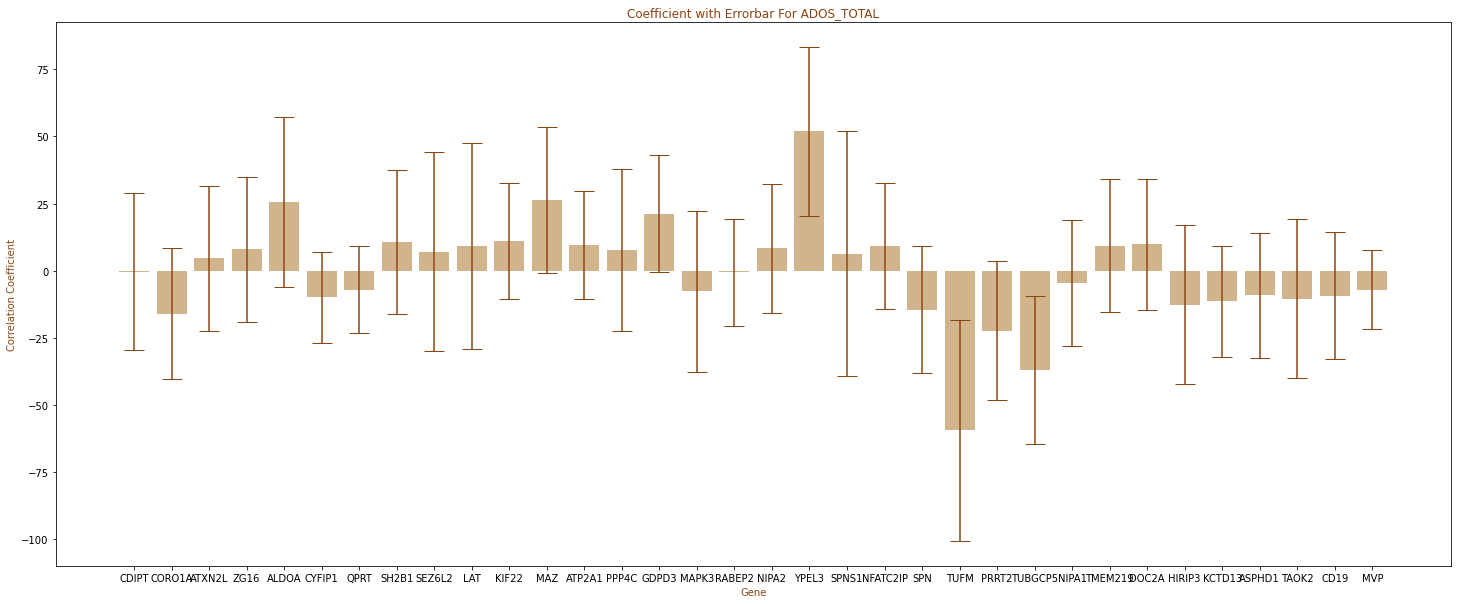

In [57]:
plot_errorbar_from_table(est2_total,labels)
plt.title('Coefficient with Errorbar For ADOS_TOTAL',color='saddlebrown')
plt.ylabel('Correlation Coefficient',color='saddlebrown')
plt.xlabel('Gene',color='saddlebrown')

In [37]:
#significance of coefficients for ados_comm
print('ADOS_COMM')
X_comm = X_use_comm.copy()
Y_comm = Y_use_comm.copy()
X_comm = sm.add_constant(X_comm)

est_comm = sm.OLS(Y_comm, X_comm)
est2_comm = est_comm.fit()
print(est2_comm.summary())

ADOS_COMM
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.397
Date:                Fri, 04 Nov 2022   Prob (F-statistic):             0.0734
Time:                        14:10:06   Log-Likelihood:                -750.16
No. Observations:                 411   AIC:                             1570.
Df Residuals:                     376   BIC:                             1711.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5118      0.477      7.35

In [50]:
def plot_errorbar_from_table(est2_comm,labels):
    coef_comm = est2_comm.params[1::]
    ci_comm = est2_comm.conf_int()[1::,:]
    ci_rel_comm = abs(np.vstack((coef_comm,coef_comm)).transpose() - ci_comm)
    ci_rel_comm = ci_rel_comm.transpose()
    xs_comm = np.arange(len(coef_comm))

    plt.figure(figsize=(25,10))
    plt.bar(xs_comm,coef_comm,color='silver')
    plt.errorbar(xs_comm,coef_comm,ci_rel_comm,fmt='r ',capsize=10,ecolor='dimgrey')
    plt.xticks(xs_comm,labels=labels);

Text(0.5, 0, 'Gene')

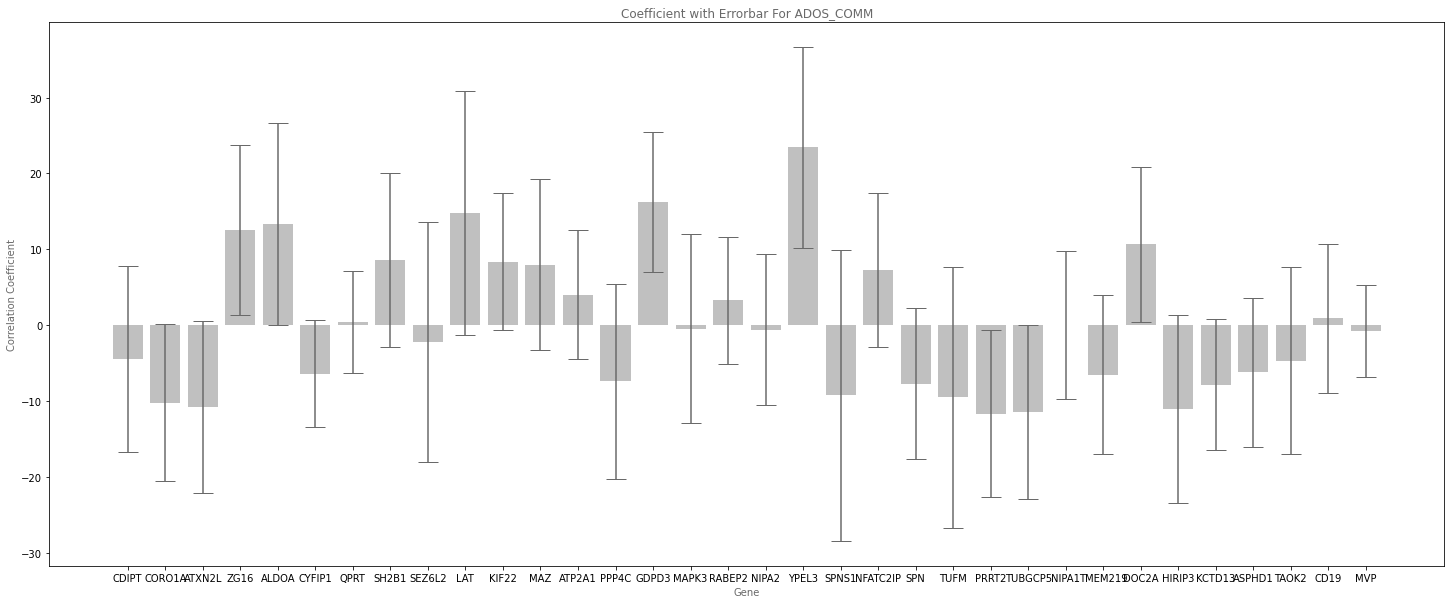

In [51]:
plot_errorbar_from_table(est2_comm,labels)
plt.title('Coefficient with Errorbar For ADOS_COMM',color='dimgrey')
plt.ylabel('Correlation Coefficient',color='dimgrey')
plt.xlabel('Gene',color='dimgrey')

In [40]:
#significance of coefficients for ados_social
print('ADOS_SOCIAL')
X_social = X_use_social.copy()
Y_social = Y_use_social.copy()
X_social = sm.add_constant(X_social)

est_social = sm.OLS(Y_social, X_social)
est2_social = est_social.fit()
print(est2_social.summary())

ADOS_SOCIAL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.042
Date:                Fri, 04 Nov 2022   Prob (F-statistic):              0.407
Time:                        14:10:15   Log-Likelihood:                -979.76
No. Observations:                 412   AIC:                             2030.
Df Residuals:                     377   BIC:                             2170.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8872      0.825      9.

In [52]:
def plot_errorbar_from_table(est2_social,labels):
    coef_social = est2_social.params[1::]
    ci_social = est2_social.conf_int()[1::,:]
    ci_rel_social = abs(np.vstack((coef_social,coef_social)).transpose() - ci_social)
    ci_rel_social = ci_rel_social.transpose()
    xs_social = np.arange(len(coef_social))

    plt.figure(figsize=(25,10))
    plt.bar(xs_social,coef_social,color='powderblue')
    plt.errorbar(xs_social,coef_social,ci_rel_social,fmt='r ',capsize=10,ecolor='midnightblue')
    plt.xticks(xs_social,labels=labels);

Text(0.5, 0, 'Gene')

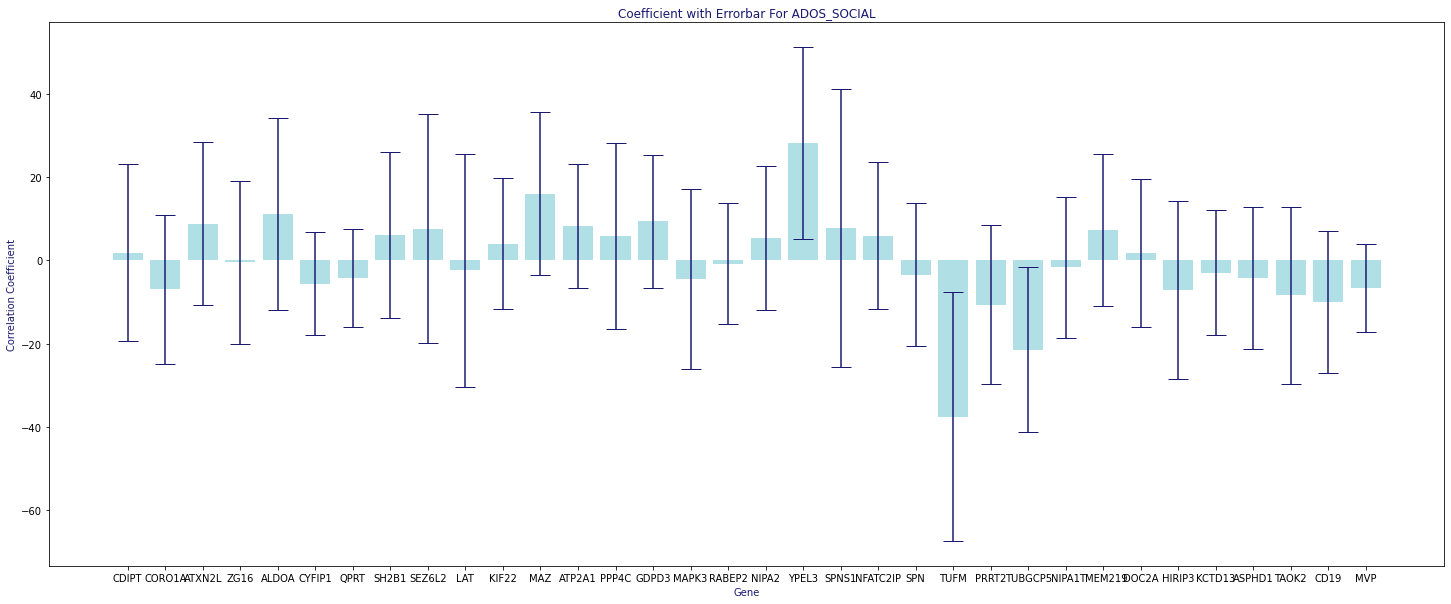

In [53]:
plot_errorbar_from_table(est2_social,labels)
plt.title('Coefficient with Errorbar For ADOS_SOCIAL',color='midnightblue')
plt.ylabel('Correlation Coefficient',color='midnightblue')
plt.xlabel('Gene',color='midnightblue')

In [43]:
#significance of coefficients for ados_rrb
print('ADOS_RRB')
X_rrb = X_use_rrb.copy()
Y_rrb = Y_use_rrb.copy()
X_rrb = sm.add_constant(X_rrb)

est_rrb = sm.OLS(Y_rrb, X_rrb)
est2_rrb = est_rrb.fit()
print(est2_rrb.summary())

ADOS_RRB
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.051
Date:                Fri, 04 Nov 2022   Prob (F-statistic):              0.395
Time:                        14:10:23   Log-Likelihood:                -672.52
No. Observations:                 375   AIC:                             1415.
Df Residuals:                     340   BIC:                             1552.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3384      0.485      4.823

In [54]:
def plot_errorbar_from_table(est2_rrb,labels):
    coef_rrb = est2_rrb.params[1::]
    ci_rrb = est2_rrb.conf_int()[1::,:]
    ci_rel_rrb = abs(np.vstack((coef_rrb,coef_rrb)).transpose() - ci_rrb)
    ci_rel_rrb = ci_rel_rrb.transpose()
    xs_rrb = np.arange(len(coef_rrb))

    plt.figure(figsize=(25,10))
    plt.bar(xs_rrb,coef_rrb,color='darkseagreen')
    plt.errorbar(xs_rrb,coef_rrb,ci_rel_rrb,fmt='r ',capsize=10,ecolor='darkgreen')
    plt.xticks(xs_rrb,labels=labels);

Text(0.5, 0, 'Gene')

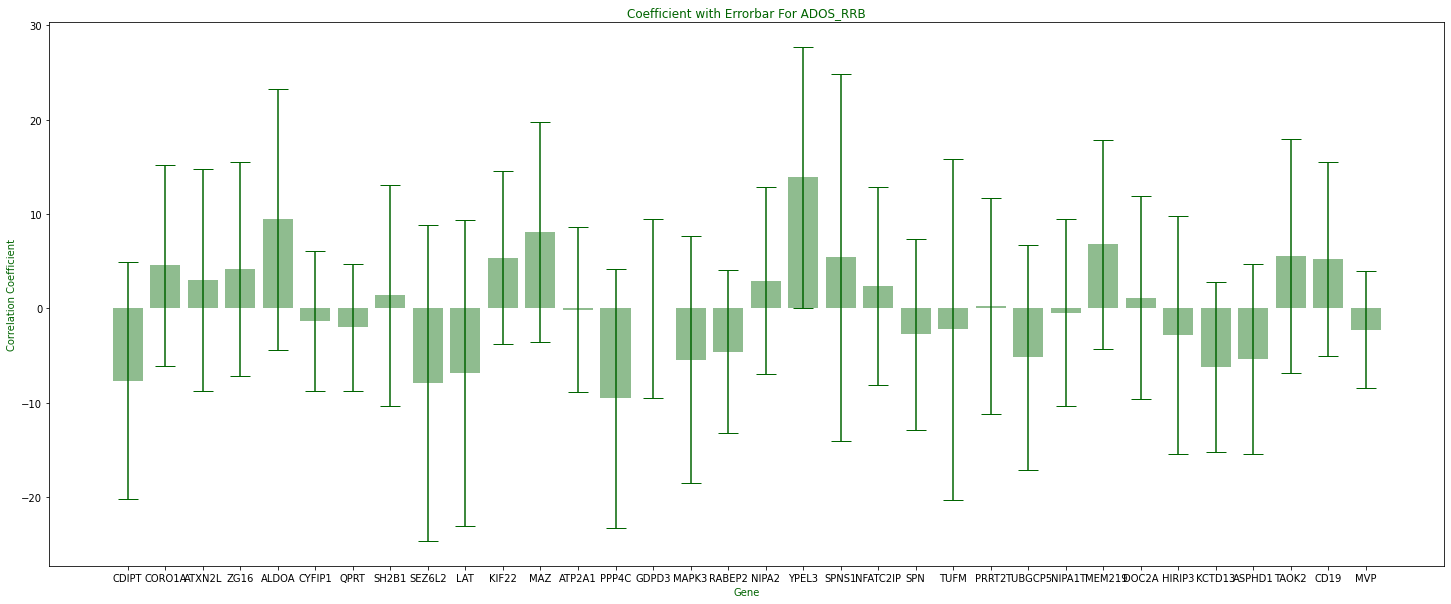

In [55]:
plot_errorbar_from_table(est2_rrb,labels)
plt.title('Coefficient with Errorbar For ADOS_RRB',color='darkgreen')
plt.ylabel('Correlation Coefficient',color='darkgreen')
plt.xlabel('Gene',color='darkgreen')